# Nashville Area Housing Sales Price Prediction

## Nashville Data cleaning

In [20]:
# import cleaning packages 
import pandas as pd
import pickle as pk
import numpy as np

In [182]:
# read the Nashville raw data 
raw_data = pd.read_excel("Nashville_raw_data.xlsx")

In [183]:
raw_data.dtypes

UniqueID                    int64
ParcelID                   object
LandUse                    object
PropertyAddress            object
SaleDate           datetime64[ns]
SalePrice                   int64
LegalReference             object
SoldAsVacant               object
OwnerName                  object
OwnerAddress               object
Acreage                   float64
TaxDistrict                object
LandValue                 float64
BuildingValue             float64
TotalValue                float64
YearBuilt                 float64
Bedrooms                  float64
FullBath                  float64
HalfBath                  float64
dtype: object

In [100]:
# view the raw data
raw_data

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# convert the date column to numeric
raw_data["saledate_float"] = pd.to_numeric(raw_data["SaleDate"])
raw_data

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,saledate_float
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1365465600000000000
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1402358400000000000
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1474848000000000000
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1454025600000000000
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1412899200000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1432684800000000000
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1425254400000000000
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1471305600000000000
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1473206400000000000


In [110]:
# load the raw data into a data frame for cleaning
nash_df = pd.DataFrame(raw_data)

In [111]:
nash_df

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,saledate_float
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1365465600000000000
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1402358400000000000
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1474848000000000000
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1454025600000000000
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1412899200000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1432684800000000000
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1425254400000000000
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1471305600000000000
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1473206400000000000


In [112]:
# list all columns available in the dataset
nash_df.columns

Index(['UniqueID ', 'ParcelID', 'LandUse', 'PropertyAddress', 'SaleDate',
       'SalePrice', 'LegalReference', 'SoldAsVacant', 'OwnerName',
       'OwnerAddress', 'Acreage', 'TaxDistrict', 'LandValue', 'BuildingValue',
       'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath',
       'saledate_float'],
      dtype='object')

In [113]:
# create a dataset with the interested columns for the sale price prediction
nash_main = pd.DataFrame(nash_df[['PropertyAddress', 'saledate_float',
       'SalePrice', 'Acreage', 'LandValue', 'BuildingValue',
       'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath', 'HalfBath']])

In [114]:
# view main data
nash_main

,PropertyAddress,saledate_float,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,"1808 FOX CHASE DR, GOODLETTSVILLE",1365465600000000000,240000,2.3,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,"1832 FOX CHASE DR, GOODLETTSVILLE",1402358400000000000,366000,3.5,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,"1864 FOX CHASE DR, GOODLETTSVILLE",1474848000000000000,435000,2.9,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,"1853 FOX CHASE DR, GOODLETTSVILLE",1454025600000000000,255000,2.6,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,"1829 FOX CHASE DR, GOODLETTSVILLE",1412899200000000000,278000,2.0,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
56472,"1435 WINDING CREEK DR, NOLENSVILLE",1432684800000000000,157500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,"1423 WINDING CREEK DR, NOLENSVILLE",1425254400000000000,145000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,"1804 GRACE POINT LN, NOLENSVILLE",1471305600000000000,234611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,"1709 PARK TERRACE LN, NOLENSVILLE",1473206400000000000,93844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# Check for missing values in the dataset to be used
nash_main.isnull().sum()

PropertyAddress       29
saledate_float         0
SalePrice              0
Acreage            30462
LandValue          30462
BuildingValue      30462
TotalValue         30462
YearBuilt          32314
Bedrooms           32320
FullBath           32202
HalfBath           32333
dtype: int64

In [116]:
# Check valid vaules count in dataset.
nash_main.count()

PropertyAddress    56448
saledate_float     56477
SalePrice          56477
Acreage            26015
LandValue          26015
BuildingValue      26015
TotalValue         26015
YearBuilt          24163
Bedrooms           24157
FullBath           24275
HalfBath           24144
dtype: int64

In [117]:
# drop all rows with any column with missing vaule
nash_main = nash_main.dropna(axis = "index", how = "any")

In [118]:
nash_main

,PropertyAddress,saledate_float,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,"1808 FOX CHASE DR, GOODLETTSVILLE",1365465600000000000,240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,"1832 FOX CHASE DR, GOODLETTSVILLE",1402358400000000000,366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,"1864 FOX CHASE DR, GOODLETTSVILLE",1474848000000000000,435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,"1853 FOX CHASE DR, GOODLETTSVILLE",1454025600000000000,255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,"1829 FOX CHASE DR, GOODLETTSVILLE",1412899200000000000,278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
54210,"6640 HOLT RD, NASHVILLE",1467936000000000000,258000,3.00,111000.0,155800.0,268000.0,1978.0,4.0,2.0,0.0
54211,"6608 HOLT RD, NASHVILLE",1437955200000000000,339528,3.00,111000.0,141700.0,252700.0,1978.0,3.0,2.0,0.0
54212,"6635 HOLT RD, NASHVILLE",1409875200000000000,230000,3.03,111500.0,210400.0,321900.0,1980.0,3.0,2.0,0.0
54213,"6552 REDMOND LN, NASHVILLE",1416787200000000000,237900,1.03,59000.0,104100.0,163100.0,1985.0,3.0,3.0,0.0


In [119]:
# check to confirm all missing row are droped
nash_main.isnull().sum()

PropertyAddress    0
saledate_float     0
SalePrice          0
Acreage            0
LandValue          0
BuildingValue      0
TotalValue         0
YearBuilt          0
Bedrooms           0
FullBath           0
HalfBath           0
dtype: int64

In [120]:
# confirm the datatype for each column
nash_main.dtypes

PropertyAddress     object
saledate_float       int64
SalePrice            int64
Acreage            float64
LandValue          float64
BuildingValue      float64
TotalValue         float64
YearBuilt          float64
Bedrooms           float64
FullBath           float64
HalfBath           float64
dtype: object

In [121]:
# Remove duplicate from dataset
nash_main = nash_main.drop_duplicates()

In [122]:
nash_main

,PropertyAddress,saledate_float,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,"1808 FOX CHASE DR, GOODLETTSVILLE",1365465600000000000,240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,"1832 FOX CHASE DR, GOODLETTSVILLE",1402358400000000000,366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,"1864 FOX CHASE DR, GOODLETTSVILLE",1474848000000000000,435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,"1853 FOX CHASE DR, GOODLETTSVILLE",1454025600000000000,255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,"1829 FOX CHASE DR, GOODLETTSVILLE",1412899200000000000,278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
54210,"6640 HOLT RD, NASHVILLE",1467936000000000000,258000,3.00,111000.0,155800.0,268000.0,1978.0,4.0,2.0,0.0
54211,"6608 HOLT RD, NASHVILLE",1437955200000000000,339528,3.00,111000.0,141700.0,252700.0,1978.0,3.0,2.0,0.0
54212,"6635 HOLT RD, NASHVILLE",1409875200000000000,230000,3.03,111500.0,210400.0,321900.0,1980.0,3.0,2.0,0.0
54213,"6552 REDMOND LN, NASHVILLE",1416787200000000000,237900,1.03,59000.0,104100.0,163100.0,1985.0,3.0,3.0,0.0


In [123]:
nash_main["Area"] = nash_main["PropertyAddress"].str.split(",").str[1]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [124]:
nash_main

,PropertyAddress,saledate_float,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,Area
0,"1808 FOX CHASE DR, GOODLETTSVILLE",1365465600000000000,240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,GOODLETTSVILLE
1,"1832 FOX CHASE DR, GOODLETTSVILLE",1402358400000000000,366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,GOODLETTSVILLE
2,"1864 FOX CHASE DR, GOODLETTSVILLE",1474848000000000000,435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,GOODLETTSVILLE
3,"1853 FOX CHASE DR, GOODLETTSVILLE",1454025600000000000,255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,GOODLETTSVILLE
4,"1829 FOX CHASE DR, GOODLETTSVILLE",1412899200000000000,278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,GOODLETTSVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...
54210,"6640 HOLT RD, NASHVILLE",1467936000000000000,258000,3.00,111000.0,155800.0,268000.0,1978.0,4.0,2.0,0.0,NASHVILLE
54211,"6608 HOLT RD, NASHVILLE",1437955200000000000,339528,3.00,111000.0,141700.0,252700.0,1978.0,3.0,2.0,0.0,NASHVILLE
54212,"6635 HOLT RD, NASHVILLE",1409875200000000000,230000,3.03,111500.0,210400.0,321900.0,1980.0,3.0,2.0,0.0,NASHVILLE
54213,"6552 REDMOND LN, NASHVILLE",1416787200000000000,237900,1.03,59000.0,104100.0,163100.0,1985.0,3.0,3.0,0.0,NASHVILLE


In [125]:
nash_main.columns

Index(['PropertyAddress', 'saledate_float', 'SalePrice', 'Acreage',
       'LandValue', 'BuildingValue', 'TotalValue', 'YearBuilt', 'Bedrooms',
       'FullBath', 'HalfBath', 'Area'],
      dtype='object')

In [126]:
# Select columns and data needed
nash_main = pd.DataFrame(nash_main[['Area', 'saledate_float', 'SalePrice', 'Acreage', 'LandValue',
       'BuildingValue', 'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath',
       'HalfBath']])

In [236]:
nash_main

,Area,saledate_float,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,GOODLETTSVILLE,1365465600000000000,240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,GOODLETTSVILLE,1402358400000000000,366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,GOODLETTSVILLE,1474848000000000000,435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,GOODLETTSVILLE,1454025600000000000,255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,GOODLETTSVILLE,1412899200000000000,278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
54210,NASHVILLE,1467936000000000000,258000,3.00,111000.0,155800.0,268000.0,1978.0,4.0,2.0,0.0
54211,NASHVILLE,1437955200000000000,339528,3.00,111000.0,141700.0,252700.0,1978.0,3.0,2.0,0.0
54212,NASHVILLE,1409875200000000000,230000,3.03,111500.0,210400.0,321900.0,1980.0,3.0,2.0,0.0
54213,NASHVILLE,1416787200000000000,237900,1.03,59000.0,104100.0,163100.0,1985.0,3.0,3.0,0.0


In [128]:
nash_main.dtypes

Area               object
saledate_float      int64
SalePrice           int64
Acreage           float64
LandValue         float64
BuildingValue     float64
TotalValue        float64
YearBuilt         float64
Bedrooms          float64
FullBath          float64
HalfBath          float64
dtype: object

In [129]:
# Pickle the data
with open("nash_main.pkl", "wb") as file:
    pk.dump(nash_main, file)

# view data linearity against dependent variable (SalePrice)
Outlier detection

In [233]:
# import matplot libary
import matplotlib.pyplot as plt

In [235]:
#specify plot style
plt.style.use("seaborn-whitegrid")

Text(0, 0.5, 'Sale Price')

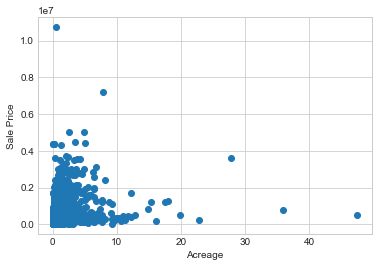

In [240]:
# Saleprice against Acreage
plt.scatter(nash_main[["Acreage"]], nash_main[["SalePrice"]])
plt.xlabel("Acreage")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

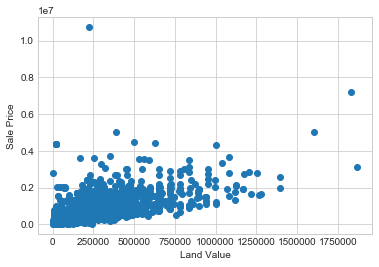

In [241]:
# Saleprice against landvalue
plt.scatter(nash_main[["LandValue"]], nash_main[["SalePrice"]])
plt.xlabel("Land Value")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

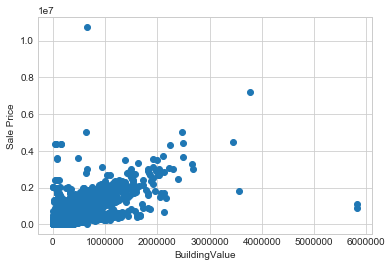

In [242]:
# Saleprice against BuildingValue
plt.scatter(nash_main[["BuildingValue"]], nash_main[["SalePrice"]])
plt.xlabel("BuildingValue")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

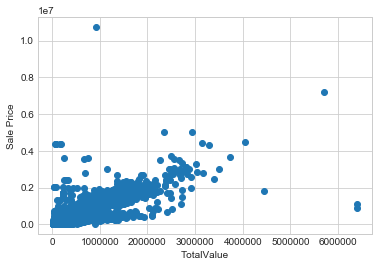

In [243]:
# Saleprice against Total Value
plt.scatter(nash_main[["TotalValue"]], nash_main[["SalePrice"]])
plt.xlabel("TotalValue")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

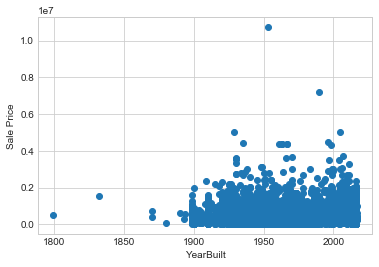

In [244]:
# Saleprice against YearBuilt
plt.scatter(nash_main[["YearBuilt"]], nash_main[["SalePrice"]])
plt.xlabel("YearBuilt")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

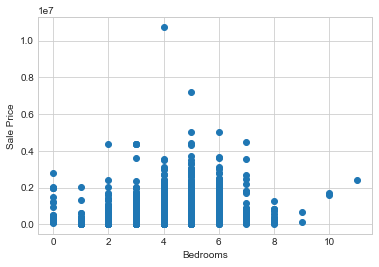

In [245]:
# Saleprice against Bedrooms
plt.scatter(nash_main[["Bedrooms"]], nash_main[["SalePrice"]])
plt.xlabel("Bedrooms")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

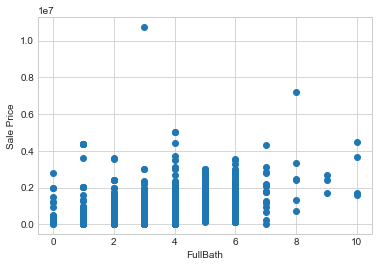

In [246]:
# Saleprice against FullBath
plt.scatter(nash_main[["FullBath"]], nash_main[["SalePrice"]])
plt.xlabel("FullBath")
plt.ylabel("Sale Price")

Text(0, 0.5, 'Sale Price')

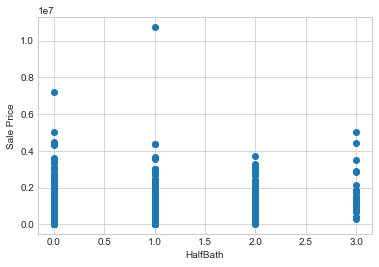

In [247]:
# Saleprice against HalfBath 
plt.scatter(nash_main[["HalfBath"]], nash_main[["SalePrice"]])
plt.xlabel("HalfBath")
plt.ylabel("Sale Price")

-------------------------------

## Training and Testing Data prep

In [130]:
# Load pickel data
with open("nash_main.pkl", "rb") as file:
    data_df = pk.load(file)

In [131]:
data_df

,Area,saledate_float,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,GOODLETTSVILLE,1365465600000000000,240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,GOODLETTSVILLE,1402358400000000000,366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,GOODLETTSVILLE,1474848000000000000,435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,GOODLETTSVILLE,1454025600000000000,255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,GOODLETTSVILLE,1412899200000000000,278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
54210,NASHVILLE,1467936000000000000,258000,3.00,111000.0,155800.0,268000.0,1978.0,4.0,2.0,0.0
54211,NASHVILLE,1437955200000000000,339528,3.00,111000.0,141700.0,252700.0,1978.0,3.0,2.0,0.0
54212,NASHVILLE,1409875200000000000,230000,3.03,111500.0,210400.0,321900.0,1980.0,3.0,2.0,0.0
54213,NASHVILLE,1416787200000000000,237900,1.03,59000.0,104100.0,163100.0,1985.0,3.0,3.0,0.0


In [ ]:
# Transform the Area column to numeric

In [11]:
# import sklearn
from sklearn.preprocessing import LabelEncoder

In [12]:
# create an instance of label encoder
lab = LabelEncoder()

In [132]:
# Using .fit_transform function to fit label
# encoder and return encoded label
Area = lab.fit_transform(data_df["Area"])

In [133]:
Area

array([2, 2, 2, ..., 7, 7, 7])

In [134]:
data_df["Area"] = Area

In [135]:
data_df

,Area,saledate_float,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2,1365465600000000000,240000,2.30,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,2,1402358400000000000,366000,3.50,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,2,1474848000000000000,435000,2.90,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,2,1454025600000000000,255000,2.60,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,2,1412899200000000000,278000,2.00,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
54210,7,1467936000000000000,258000,3.00,111000.0,155800.0,268000.0,1978.0,4.0,2.0,0.0
54211,7,1437955200000000000,339528,3.00,111000.0,141700.0,252700.0,1978.0,3.0,2.0,0.0
54212,7,1409875200000000000,230000,3.03,111500.0,210400.0,321900.0,1980.0,3.0,2.0,0.0
54213,7,1416787200000000000,237900,1.03,59000.0,104100.0,163100.0,1985.0,3.0,3.0,0.0


In [137]:
with open("TrainTest.pkl", "wb") as file:
    pk.dump(data_df, file)

In [138]:
# Convert dataframe to numpy for model training
x = data_df[['Area', 'saledate_float', 'Acreage', 'LandValue',
       'BuildingValue', 'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath',
       'HalfBath']]
x = x.to_numpy()

In [139]:
x

array([[2.0000000e+00, 1.3654656e+18, 2.3000000e+00, ..., 3.0000000e+00,
        3.0000000e+00, 0.0000000e+00],
       [2.0000000e+00, 1.4023584e+18, 3.5000000e+00, ..., 3.0000000e+00,
        3.0000000e+00, 2.0000000e+00],
       [2.0000000e+00, 1.4748480e+18, 2.9000000e+00, ..., 4.0000000e+00,
        3.0000000e+00, 0.0000000e+00],
       ...,
       [7.0000000e+00, 1.4098752e+18, 3.0300000e+00, ..., 3.0000000e+00,
        2.0000000e+00, 0.0000000e+00],
       [7.0000000e+00, 1.4167872e+18, 1.0300000e+00, ..., 3.0000000e+00,
        3.0000000e+00, 0.0000000e+00],
       [7.0000000e+00, 1.4157504e+18, 4.6000000e-01, ..., 3.0000000e+00,
        2.0000000e+00, 1.0000000e+00]])

In [140]:
y = data_df[["SalePrice"]]
y = y.to_numpy()

In [142]:
y

array([[240000],
       [366000],
       [435000],
       ...,
       [230000],
       [237900],
       [259000]], dtype=int64)

## Split the Data to training and Testing 

In [82]:
# import the sklearn split lib
from sklearn.model_selection import train_test_split

In [143]:
# Split the dataset (80% train and 20% test)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

# Build and Train the Sale price Model

In [86]:
# import the regression sklearn lib
from sklearn.linear_model import LinearRegression as rg

In [144]:
# fit the model with the train data
reg = rg().fit(x_train, y_train)

In [145]:
# view the coefficient of determination of the prediction(Score)
reg.score(x_train, y_train)

0.7183716027845588

In [147]:
# check coefficent 
reg.coef_

array([[ 1.03144448e+01,  1.18088435e-12, -3.73042996e-01,
        -1.87499410e+00, -2.58230340e+00,  3.23678827e+00,
        -5.43095510e+02, -1.71440753e+00, -4.12258434e+00,
        -1.87610110e+00]])

In [149]:
# check intercept
reg.intercept_

array([-553829.1475381])

# Test the price model

In [150]:
test_prediction = reg.predict(x_test)

In [151]:
test_prediction

array([[829456.93313988],
       [161853.86626545],
       [287082.27764766],
       ...,
       [578124.71220144],
       [284293.20491026],
       [224414.95484097]])

In [152]:
y_test

array([[895000],
       [100000],
       [274500],
       ...,
       [910000],
       [210000],
       [235000]], dtype=int64)

# Score Price Model prediction using r2

In [153]:
# import r2_score lib
from sklearn.metrics import r2_score

In [154]:
price_model_score = r2_score(y_test, test_prediction)
price_model_score

0.6220143464258374

# Pickle the price ML model

In [155]:
with open("SalePriceModel.pkl", "wb") as file:
    pk.dump(reg, file)

# production prediction

In [220]:
def get_price(Area, saledate_float, Acreage, LandValue,
       BuildingValue, TotalValue, YearBuilt, Bedrooms, FullBath,
       HalfBath):
    dtt = {"Area" : Area, "saledate_float" : saledate_float, "Acreage" : Acreage, "LandValue": LandValue ,
       "BuildingValue" : BuildingValue, "TotalValue" : TotalValue, "YearBuilt" : YearBuilt, "Bedrooms" : Bedrooms, "FullBath" : FullBath,
       "HalfBath" : HalfBath}
    data1 = pd.DataFrame(data = dtt, index = [0], columns = ['Area', 'saledate_float', 'Acreage', 'LandValue',
       'BuildingValue', 'TotalValue', 'YearBuilt', 'Bedrooms', 'FullBath',
       'HalfBath'])
    data1.to_numpy()
    SalePrice = reg.predict(data1.to_numpy())
    return "Predicted Sale Price is : {} US Dollars".format(SalePrice[0][0])
    

In [232]:
get_price(123,1.4023584e+18, 4,2,34,56,2021,4,3,2)

'Predicted Sale Price is : 5931.837732989108 US Dollars'